In [1]:
import numpy as np
from scipy.io import readsav

In [3]:
vr = np.array([0.07025444373403009, 0.14139327496887916, 0.21341649370454718,  
      0.2863240999410342, 0.3601160936783402, 0.43479247491646505,  
      0.510353243655409, 0.5867983998951719, 0.6641279436357537,  
      0.7423418748771545, 0.8214401936193743, 0.901422899862413,  
      0.9822899936062708, 1.0640414748509475, 1.146677343596443,  
      1.230197599842758, 1.3146022435898914, 1.3998912748378438,  
      1.4860646935866155, 1.5731224998362061, 1.6610646935866153,  
      1.749891274837844, 1.8396022435898913, 1.9301975998427576,  
      2.0216773435964432, 2.1140414748509473, 2.207289993606271,  
      2.301422899862413, 2.396440193619374, 2.4923418748771544,  
      2.5891279436357535, 2.6867983998951717, 2.785353243655409,  
      2.8847924749164653, 2.9851160936783403, 3.086324099941034,  
      3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5]
)
vx = np.array([-3.5, -3.39525444373403, -3.291393274968879, -3.1884164937045467,  
      -3.086324099941034, -2.9851160936783403, -2.8847924749164653,  
      -2.785353243655409, -2.6867983998951717, -2.5891279436357535,  
      -2.4923418748771544, -2.396440193619374, -2.301422899862413,  
      -2.207289993606271, -2.1140414748509473, -2.0216773435964432,  
      -1.9301975998427576, -1.8396022435898913, -1.749891274837844,  
      -1.6610646935866153, -1.5731224998362061, -1.4860646935866155,  
      -1.3998912748378438, -1.3146022435898914, -1.230197599842758,  
      -1.146677343596443, -1.0640414748509475, -0.9822899936062708,  
      -0.901422899862413, -0.8214401936193743, -0.7423418748771545,  
      -0.6641279436357537, -0.5867983998951719, -0.510353243655409,  
      -0.43479247491646505, -0.3601160936783402, -0.2863240999410342,  
      -0.21341649370454718, -0.14139327496887916, -0.07025444373403009,  
      0.07025444373403009, 0.14139327496887916, 0.21341649370454718,  
      0.2863240999410342, 0.3601160936783402, 0.43479247491646505,  
      0.510353243655409, 0.5867983998951719, 0.6641279436357537,  
      0.7423418748771545, 0.8214401936193743, 0.901422899862413,  
      0.9822899936062708, 1.0640414748509475, 1.146677343596443,  
      1.230197599842758, 1.3146022435898914, 1.3998912748378438,  
      1.4860646935866155, 1.5731224998362061, 1.6610646935866153,  
      1.749891274837844, 1.8396022435898913, 1.9301975998427576,  
      2.0216773435964432, 2.1140414748509473, 2.207289993606271,  
      2.301422899862413, 2.396440193619374, 2.4923418748771544,  
      2.5891279436357535, 2.6867983998951717, 2.785353243655409,  
      2.8847924749164653, 2.9851160936783403, 3.086324099941034,  
      3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5])
vx_shift = [0.0]
Tmaxwell = [0.02524895]
mol = 2
mu = 2.0
q=1.602177e-19
mH=1.6726231e-27
Tnorm = 74.317975

In [17]:
nvr = len(vr)
nvx = len(vx)
nx = len(vx_shift)
vth=np.sqrt(2*q*Tnorm/(mu*mH))

In [11]:
AN = np.zeros((nvr,nvx,2), dtype=np.float64)
BN = np.zeros((nvr,nvx,2), dtype=np.float64)
maxwell = np.zeros((nvr,nvx,nx),dtype=np.float64)
print(maxwell.shape)

(40, 80, 1)


(array([ 4.,  4.,  4.,  4.,  6.,  4.,  8.,  8., 10., 28.]),
 array([-144227.01835126, -137018.57298227, -129810.12761327,
        -122601.68224428, -115393.23687529, -108184.7915063 ,
        -100976.34613731,  -93767.90076832,  -86559.45539933,
         -79351.01003033,  -72142.56466134]),
 <BarContainer object of 10 artists>)

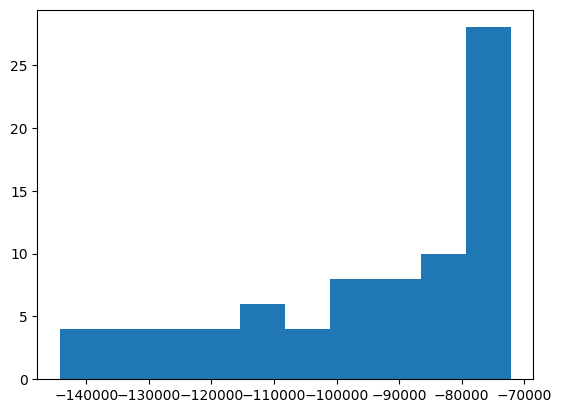

In [33]:
import matplotlib.pyplot as plt
for k in range(0,nx):

    if Tmaxwell[k]>0.0:
        for i in range(0,nvr):
            arg = -((vr[i]**2 + ((vx) - (vx_shift[k] / vth))**2) * mol * Tnorm / Tmaxwell[k])
            ind_arg = np.where(np.logical_and( 0.0 > arg , arg > -80))
            maxwell[i,:,k][ind_arg] = np.exp(arg[ind_arg])
plt.hist(arg)   

In [7]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [9]:
data_file = readsav('000_maxwell_data.sav')
data_file['maxwell'].shape

(80, 40)

In [ ]:
# ;
# ; Create_Shifted Maxwellian.include
# ;
# ; This INCLUDE file is used by Kinetic_H2.pro and Kinetic_H.pro
# ;
# ; Input:
# ;	Vx_shift  - dblarr(nx), (m s^-1)
# ;       Tmaxwell  - dblarr(nx), (eV)
# ;       Shifted_Maxwellian_Debug - if set, then print debugging information
# ;       mol       - 1=atom, 2=diatomic molecule
# ;
# ; Output:
# ;	Maxwell   - dblarr(nvr,nvx,nx) a shifted Maxwellian distribution function
# ;		    having numerically evaluated vx moment close to Vx_shift and
# ;		    temperature close to Tmaxwell
# ;
# ; Notes on Algorithm
# ;
# ;   One might think that Maxwell could be simply computed by a direct evaluation of the EXP function:
# ;
# ;     for i=0,nvr-1 do begin
# ;        arg=-(vr(i)^2+(vx-Vx_shift/vth)^2) * mol*Tnorm/Tmaxwell
# ;        Maxwell(i,*,k)=exp(arg > (-80))
# ;     endfor
# ;
# ;   But owing to the discrete velocity space bins, this method does not necessarily lead to a digital representation 
# ;   of a shifted Maxwellian (Maxwell) that when integrated numerically has the desired vx moment of Vx_shift
# ;   and temperature, Tmaxwell.
# ;
# ;   In order to insure that Maxwell has the desired vx and T moments when evaluated numerically, a compensation
# ;   scheme is employed - similar to that used in Interp_fVrVxX.pro
# ;

In [ ]:
import numpy as np

def create_shifted_maxwellian(Vx_shift, Tmaxwell, shifted_Maxwellian_debug, mol, vr, vx, vth, Tnorm, Vr2pidVr, Vx, dVx, vol, vr2vx2_2D, vr2vx2_ran2, vth2, q, mu, mH, Nx, nvr, nvx, jpa, jpb, jnb, jna):
    AN = np.zeros((nvr, nvx, 2), dtype=np.float64)
    BN = np.zeros((nvr, nvx, 2), dtype=np.float64)
    sgn = [1, -1]
    Maxwell = np.zeros((nvr, nvx, Nx), dtype=np.float64)

    for k in range(Nx):
        if Tmaxwell[k] > 0.0:
            for i in range(nvr):
                arg = -(vr[i]**2 + (vx - Vx_shift[k] / vth)**2) * mol * Tnorm / Tmaxwell[k]
                Maxwell[i, :, k] = np.exp(np.where(arg > -80, arg, -80))
                
            Maxwell[:, :, k] /= np.sum(Vr2pidVr * Maxwell[:, :, k] * dVx)

            if shifted_Maxwellian_debug:
                vx_out1 = vth * np.sum(Vr2pidVr * Maxwell[:, :, k] * (Vx * dVx))
                for i in range(nvr):
                    vr2vx2_ran2[i, :] = vr[i]**2 + (vx - vx_out1 / vth)**2
                T_out1 = (mol * mu * mH) * vth2 * np.sum(Vr2pidVr * (vr2vx2_ran2 * Maxwell[:, :, k]) * dVx) / (3 * q)
                vth_local = 0.1 * np.sqrt(2 * Tmaxwell[k] * q / (mol * mu * mH))
                Terror = abs(Tmaxwell[k] - T_out1) / Tmaxwell[k]
                Verror = abs(vx_out1 - Vx_shift[k]) / vth_local

            WxD = Vx_shift[k]
            ED = WxD**2 + 3 * q * Tmaxwell[k] / (mol * mu * mH)

            WxMax = vth * np.sum(Vr2pidVr * Maxwell[:, :, k] * (Vx * dVx))
            EMax = vth2 * np.sum(vr2vx2_2D * Maxwell[:, :, k] * dVx)

            Nij = np.zeros((nvr + 2, nvx + 2), dtype=np.float64)
            Nij[1:nvr + 1, 1:nvx + 1] = Maxwell[:, :, k] * vol

            # Shift operations
            Nijp1_vx_Dvx = np.roll(Nij * vx_Dvx, shift=-1, axis=1)
            Nij_vx_Dvx = Nij * vx_Dvx
            Nijm1_vx_Dvx = np.roll(Nij * vx_Dvx, shift=1, axis=1)
            Nip1j_vr_Dvr = np.roll(Nij * vr_Dvr, shift=-1, axis=0)
            Nij_vr_Dvr = Nij * vr_Dvr
            Nim1j_vr_Dvr = np.roll(Nij * vr_Dvr, shift=1, axis=0)

            _AN = np.roll(Nij * vth_Dvx, shift=1, axis=1) - Nij * vth_Dvx
            AN[:, :, 0] = _AN[1:nvr + 1, 1:nvx + 1]
            _AN = -np.roll(Nij * vth_Dvx, shift=-1, axis=1) + Nij * vth_Dvx
            AN[:, :, 1] = _AN[1:nvr + 1, 1:nvx + 1]

            BN[:, jpa + 1:jpb + 1, 0] = Nijm1_vx_Dvx[1:nvr, jpa + 2:jpb + 1] - Nij_vx_Dvx[1:nvr, jpa + 2:jpb + 1]
            BN[:, jpa, 0] = -Nij_vx_Dvx[1:nvr, jpa + 1]
            BN[:, jnb, 0] = Nij_vx_Dvx[1:nvr, jnb + 1]
            BN[:, jna:jnb - 1, 0] = -Nijp1_vx_Dvx[1:nvr, jna + 1:jnb] + Nij_vx_Dvx[1:nvr, jna + 1:jnb]
            BN[:, :, 0] += Nim1j_vr_Dvr[1:nvr, :] - Nij_vr_Dvr[1:nvr, :]

            BN[:, jpa + 1:jpb + 1, 1] = -Nijp1_vx_Dvx[1:nvr, jpa + 2:jpb + 1] + Nij_vx_Dvx[1:nvr, jpa + 2:jpb + 1]
            BN[:, jpa, 1] = -Nijp1_vx_Dvx[1:nvr, jpa + 1]
            BN[:, jnb, 1] = Nijm1_vx_Dvx[1:nvr, jnb + 1]
            BN[:, jna:jnb - 1, 1] = Nijm1_vx_Dvx[1:nvr, jna + 1:jnb] - Nij_vx_Dvx[1:nvr, jna + 1:jnb]
            BN[:-1, :, 1] -= Nip1j_vr_Dvr[1:, :] - Nij_vr_Dvr[1:, :]
            BN[0, :, 1] -= Nip1j_vr_Dvr[0, :]

            Nij = Nij[1:nvr + 1, 1:nvx + 1]

            # Cycle through possibilities of sign(a_Max), sign(b_Max)
            TB1 = np.zeros(2, dtype=np.float64)
            TB2 = np.zeros(2, dtype=np.float64)
            ia = 0

            while ia < 2:
                TA1 = vth * np.sum(AN[:, :, ia] * Vx)
                TA2 = vth2 * np.sum(vr2vx2_2D * AN[:, :, ia])
                ib = 0

                while ib < 2:
                    if TB1[ib] == 0:
                        TB1[ib] = vth * np.sum(BN[:, :, ib] * Vx)
                    if TB2[ib] == 0:
                        TB2[ib] = vth2 * np.sum(vr2vx2_2D * BN[:, :, ib])
                    denom = TA2 * TB1[ib] - TA1 * TB2[ib]
                    b_Max = 0.0
                    a_Max = 0.0
                    if denom != 0.0 and TA1 != 0.0:
                        b_Max = (TA2 * (WxD - WxMax) - TA1 * (ED - EMax)) / denom
                        a_Max = (WxD - WxMax - TB1[ib] * b_Max) / TA1
                    if a_Max * sgn[ia] > 0.0 and b_Max * sgn[ib] > 0.0:
                        Maxwell[:, :, k] = (Nij + AN[:, :, ia] * a_Max + BN[:, :, ib] * b_Max) / vol
                        ia = 2
                        ib = 2
                    ib += 1
                ia += 1

            Maxwell[:, :, k] /= np.sum(Vr2pidVr * Maxwell[:, :, k] * dVx)

            if shifted_Maxwellian_debug:
                vx_out2 = vth * np.sum(Vr2pidVr * Maxwell[:, :, k] * (Vx * dVx))
                for i in range(nvr):
                    vr2vx2_ran2[i, :] = vr[i]**2 + (vx - vx_out2 / vth)**2
                T_out2 = (mol * mu * mH) * vth2 * np.sum(Vr2pidVr * (vr2vx2_ran2 * Maxwell[:, :, k]) * dVx) / (3 * q)
                Terror2 = abs(Tmaxwell[k] - T_out2) / Tmaxwell[k]
                Verror2 = abs(Vx_shift[k] - vx_out2) / vth_local
                print(f'CREATE_SHIFTED_MAXWELLIAN=> Terror: {Terror} -> {Terror2}  Verror: {Verror} -> {Verror2}')


In [ ]:
   AN=dblarr(nvr,nvx,2)
   BN=dblarr(nvr,nvx,2)
   sgn=[1,-1]
   Maxwell(*)=0.0
   for k=0,nx-1 do begin
      if Tmaxwell(k) gt 0.0 then begin
         for i=0,nvr-1 do begin
            arg=-(vr(i)^2+(vx-Vx_shift(k)/vth)^2) * mol*Tnorm/Tmaxwell(k)
            arg=arg < 0.0
            Maxwell(i,*,k)=exp(arg > (-80))
         endfor
         Maxwell(*,*,k)=Maxwell(*,*,k)/total(Vr2pidVr*(Maxwell(*,*,k)#dVx))
         if shifted_Maxwellian_debug then begin
            vx_out1=vth*total(Vr2pidVr*(Maxwell(*,*,k)#(Vx*dVx)))
            for i=0,nvr-1 do vr2vx2_ran2(i,*)=vr(i)^2+(vx-vx_out1/vth)^2
            T_out1=(mol*mu*mH)*vth2*total(Vr2pidVr*((vr2vx2_ran2*Maxwell(*,*,k))#dVx))/(3*q)
            vth_local=0.1*sqrt(2*Tmaxwell(k)*q/(mol*mu*mH))
            Terror=abs(Tmaxwell(k)-T_out1)/Tmaxwell(k) & Verror=abs(vx_out1-vx_shift(k))/vth_local
         endif
;
; Compute desired moments
;
         WxD=Vx_shift(k)
         ED=WxD^2+3*q*Tmaxwell(k)/(mol*mu*mH)
;
; Compute present moments of Maxwell, WxMax, and EMax 
;     
         WxMax=vth*total(Vr2pidVr*(Maxwell(*,*,k)#(Vx*dVx)))
         EMax=vth2*total(Vr2pidVr*((vr2vx2_2D*Maxwell(*,*,k))#dVx))
;
; Compute Nij from Maxwell, padded with zeros
;
         Nij=dblarr(nvr+2,nvx+2)
         Nij(1:nvr,1:nvx)=Maxwell(*,*,k)*vol
      
         Nijp1_vx_Dvx=shift(Nij*vx_Dvx,0,-1)
         Nij_vx_Dvx  =Nij*vx_Dvx
         Nijm1_vx_Dvx=shift(Nij*vx_Dvx,0,1)
         Nip1j_vr_Dvr=shift(Nij*vr_Dvr,-1,0)
         Nij_vr_Dvr  =Nij*vr_Dvr
         Nim1j_vr_Dvr=shift(Nij*vr_Dvr,1,0)
;
; Compute Ap, Am, Bp, and Bm (0=p 1=m)
;
         _AN=shift(Nij*vth_Dvx,0,1) - Nij*vth_Dvx
         AN(*,*,0)=_AN(1:nvr,1:nvx)
         _AN=-shift(Nij*vth_Dvx,0,-1) + Nij*vth_Dvx
         AN(*,*,1)=_AN(1:nvr,1:nvx)
      
         BN(*,jpa+1:jpb,0)=Nijm1_vx_Dvx(1:nvr,jpa+2:jpb+1)-Nij_vx_Dvx(1:nvr,jpa+2:jpb+1)
         BN(*,jpa,0)=-Nij_vx_Dvx(1:nvr,jpa+1)
         BN(*,jnb,0)=Nij_vx_Dvx(1:nvr,jnb+1)
         BN(*,jna:jnb-1,0)=-Nijp1_vx_Dvx(1:nvr,jna+1:jnb)+Nij_vx_Dvx(1:nvr,jna+1:jnb)
         BN(*,*,0)=BN(*,*,0) + Nim1j_vr_Dvr(1:nvr,1:nvx)-Nij_vr_Dvr(1:nvr,1:nvx)

         BN(*,jpa+1:jpb,1)=-Nijp1_vx_Dvx(1:nvr,jpa+2:jpb+1)+Nij_vx_Dvx(1:nvr,jpa+2:jpb+1)
         BN(*,jpa,1)=-Nijp1_vx_Dvx(1:nvr,jpa+1)
         BN(*,jnb,1)=Nijm1_vx_Dvx(1:nvr,jnb+1)
         BN(*,jna:jnb-1,1)=Nijm1_vx_Dvx(1:nvr,jna+1:jnb)-Nij_vx_Dvx(1:nvr,jna+1:jnb)
         BN(1:nvr-1,*,1)=BN(1:nvr-1,*,1) - Nip1j_vr_Dvr(2:nvr,1:nvx)+Nij_vr_Dvr(2:nvr,1:nvx)
         BN(0,*,1)=BN(0,*,1) - Nip1j_vr_Dvr(1,1:nvx)
;
; Remove padded zeros in Nij
;         
         Nij=Nij(1:nvr,1:nvx)
;
; Cycle through 4 possibilies of sign(a_Max),sign(b_Max)
;
         TB1=fltarr(2) & TB2=fltarr(2)
         ia=0
         while ia lt 2 do begin
;
; Compute TA1, TA2
;
            TA1=vth*total(AN(*,*,ia)#Vx)
            TA2=vth2*total(vr2vx2_2D*AN(*,*,ia))
            ib=0
            while ib lt 2 do begin
;     
; Compute TB1, TB2
;
               if TB1(ib) eq 0 then TB1(ib)=vth*total(BN(*,*,ib)#Vx)
               if TB2(ib) eq 0 then TB2(ib)=vth2*total(vr2vx2_2D*BN(*,*,ib))
               denom=TA2*TB1(ib)-TA1*TB2(ib)
               b_Max=0.0
               a_Max=0.0
               if denom ne 0.0 and TA1 ne 0.0 then begin
                  b_Max=(TA2*(WxD-WxMax)-TA1*(ED-EMax))/denom
                  a_Max=(WxD-WxMax-TB1(ib)*b_Max)/TA1
               endif
               if a_Max*sgn(ia) gt 0.0 and b_Max*sgn(ib) gt 0.0 then begin
                  Maxwell(*,*,k)=(Nij+AN(*,*,ia)*a_Max+BN(*,*,ib)*b_Max)/vol
                  ia=2 & ib=2
               endif
               ib=ib+1
            endwhile
            ia=ia+1
         endwhile
         Maxwell(*,*,k)=Maxwell(*,*,k)/total(Vr2pidVr*(Maxwell(*,*,k)#dVx))
         if shifted_Maxwellian_debug then begin
            vx_out2=vth*total(Vr2pidVr*(Maxwell(*,*,k)#(Vx*dVx)))
            for i=0,nvr-1 do vr2vx2_ran2(i,*)=vr(i)^2+(vx-vx_out2/vth)^2
            T_out2=(mol*mu*mH)*vth2*total(Vr2pidVr*((vr2vx2_ran2*Maxwell(*,*,k))#dVx))/(3*q)
            Terror2=abs(Tmaxwell(k)-T_out2)/Tmaxwell(k) & Verror2=abs(vx_shift(k)-vx_out2)/vth_local
            print,'CREATE_SHIFTED_MAXWELLIAN=> Terror:'+sval(Terror)+'->'+sval(Terror2)+'  Verror:'+sval(Verror)+'->'+sval(Verror2)
         endif
      endif
   endfor
